### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
ventas_1 = len(tienda1)
ventas_2 = len(tienda2)
ventas_3 = len(tienda3)
ventas_4 = len(tienda4)

print(f"Productos vendidos por tienda:")
print(f"Tienda 1: {ventas_1} productos")
print(f"Tienda 2: {ventas_2} productos")
print(f"Tienda 3: {ventas_3} productos")
print(f"Tienda 4: {ventas_4} productos")

#Podemos decir que tiene un nivel igual de venta de producto sienda la diferencia muy minima por lo que no seria un aspecto a considerar para este analisis


Productos vendidos por tienda:
Tienda 1: 2359 productos
Tienda 2: 2359 productos
Tienda 3: 2359 productos
Tienda 4: 2358 productos


#1. Análisis de facturación



In [20]:
#Primero el ingreso de cada tienda sumando su precio en una nueva columna 'total'
#En el codigo la expresion :,.2f lo usaremos para el redondeo de decimales permitiendo leer mejor el dato que se mostrara
# Lista de DataFrames de tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]

# Lista para almacenar los totales
facturaciones = []

# Calculamos la facturación con la función modificada
def calcular_facturacion_y_guardar(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        tienda['Total'] = tienda['Precio']
        total = tienda['Total'].sum()
        facturaciones.append(total)
        print(f"Tienda {i}: S/ {total:,.2f}")

# Ejecutamos la función
calcular_facturacion_y_guardar(tiendas)



Tienda 1: S/ 1,150,880,400.00
Tienda 2: S/ 1,116,343,500.00
Tienda 3: S/ 1,098,019,600.00
Tienda 4: S/ 1,038,375,700.00


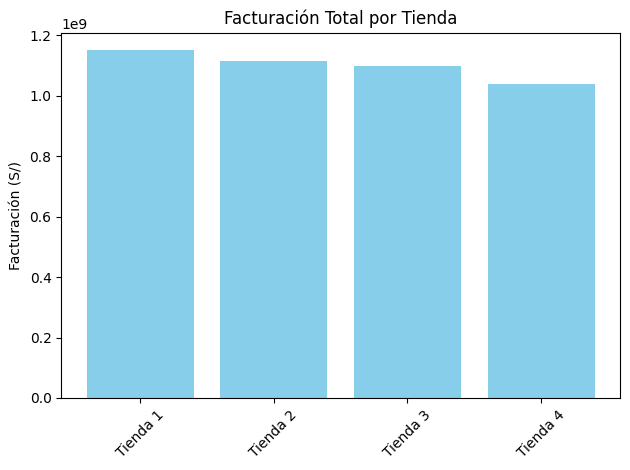

In [21]:
from matplotlib import pyplot as plt
# Graficamos con barras
tienda_ejex = [f"Tienda {i+1}" for i in range(len(tiendas))]
plt.bar(tienda_ejex, facturaciones, color='skyblue')
plt.ylabel("Facturación (S/)")
plt.title("Facturación Total por Tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


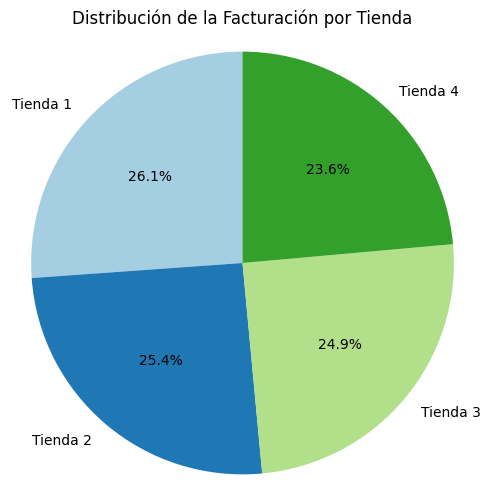

In [23]:
# Graficamos con circulo
plt.figure(figsize=(6, 6))  # Tamaño del gráfico
plt.pie(facturaciones, labels=tienda_ejex, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de la Facturación por Tienda")
plt.axis('equal')  # Hace que el gráfico sea perfectamente circular
plt.show()

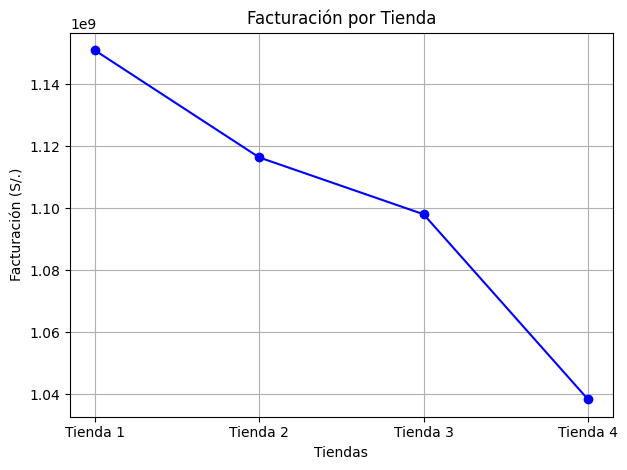

In [24]:
# Crear gráfico de línea
plt.plot(tienda_ejex, facturaciones, marker='o', linestyle='-', color='blue')
plt.title('Facturación por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación (S/.)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [7]:
#Primero debemos saber los tipos de productos que tiene cada tienda para ver si tiene el mismo margen de producto
#Usamos la fucion de panda .unique() que devuelve valores unico de la tabla util para el proposito propuesto
def mostrar_categorias_por_tienda(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        print(f"\nCategorías en Tienda {i}:")
        categorias = tienda['Categoría del Producto'].unique()
        print(categorias)

mostrar_categorias_por_tienda(tiendas)

# Crear una lista con todas las categorías únicas combinadas de todas las tiendas(Para grafico de datos agrupado)
todas_categorias = sorted(set(cat for tienda in tiendas for cat in tienda['Categoría del Producto'].unique()))



Categorías en Tienda 1:
['Electrónicos' 'Muebles' 'Juguetes' 'Electrodomésticos'
 'Artículos para el hogar' 'Deportes y diversión' 'Libros'
 'Instrumentos musicales']

Categorías en Tienda 2:
['Muebles' 'Instrumentos musicales' 'Deportes y diversión' 'Electrónicos'
 'Artículos para el hogar' 'Juguetes' 'Electrodomésticos' 'Libros']

Categorías en Tienda 3:
['Electrodomésticos' 'Muebles' 'Instrumentos musicales'
 'Deportes y diversión' 'Electrónicos' 'Juguetes'
 'Artículos para el hogar' 'Libros']

Categorías en Tienda 4:
['Electrodomésticos' 'Muebles' 'Deportes y diversión' 'Libros'
 'Electrónicos' 'Instrumentos musicales' 'Juguetes'
 'Artículos para el hogar']


In [8]:
#Aprovechando una de las funciones de panda .value_counts() que nos permitira sacar el numero de repeticiones de nombre de cada columna
#Logrando asi saber el numero de venta de cada categoria que conocemos anteriormente
def mostrar_ventas_por_categoria(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        print(f"\nVentas por categoría en Tienda {i}:")
        ventas_categoria = tienda['Categoría del Producto'].value_counts()
        print(ventas_categoria)
mostrar_ventas_por_categoria(tiendas)




Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

Ventas por categoría en Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

Ven

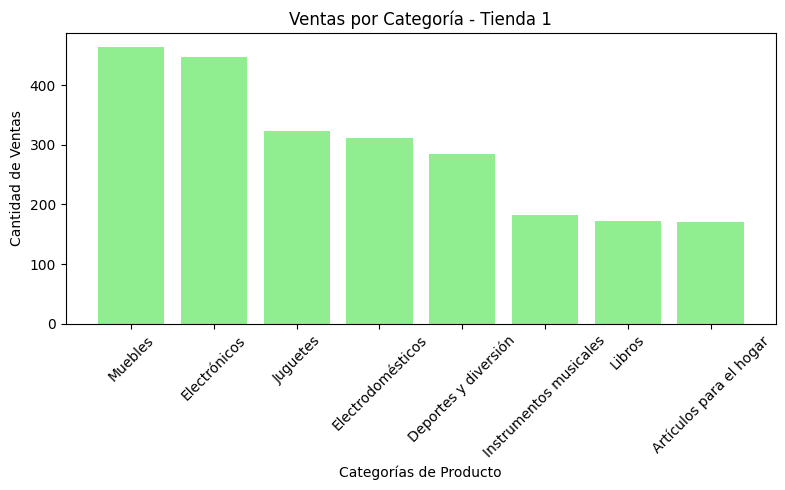

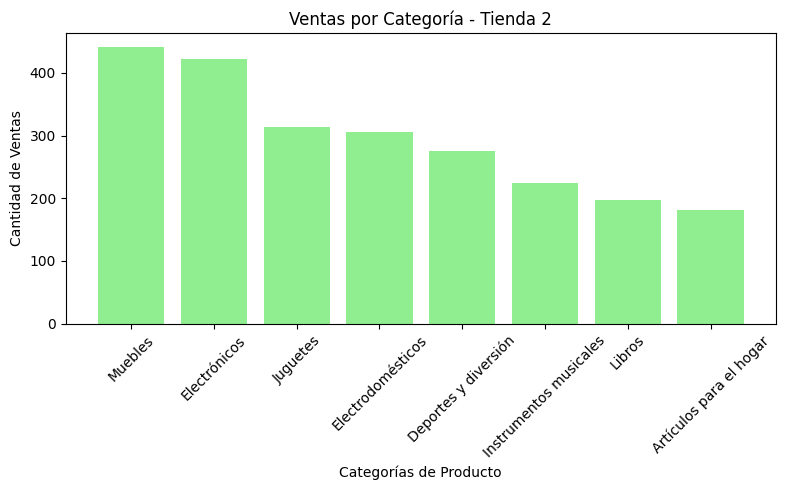

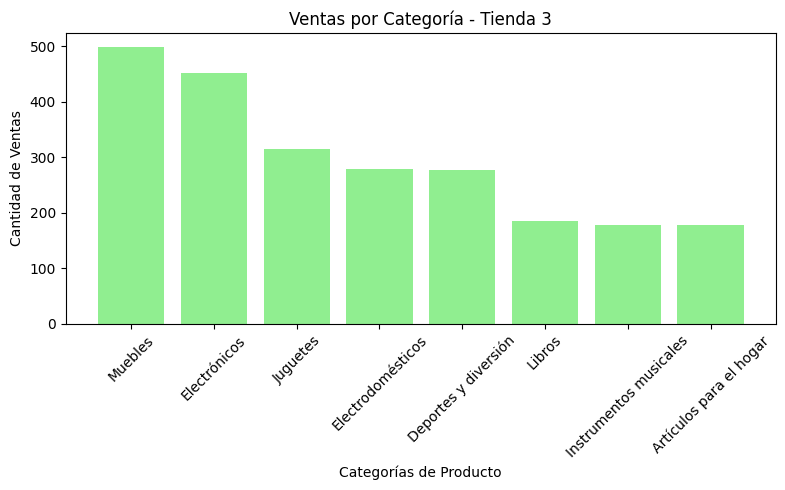

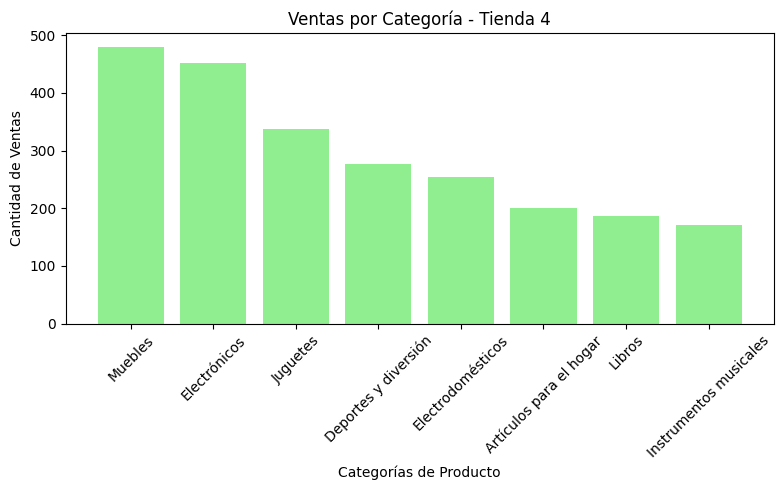

In [9]:
#Ahora graficaremos esos datos de cada tienda
for i, tienda in enumerate(tiendas, start=1):
    # Contamos ventas por categoría
    ventas_categoria = tienda['Categoría del Producto'].value_counts()

    # Preparamos datos para graficar
    categorias = ventas_categoria.index
    cantidades = ventas_categoria.values

    # Graficamos
    plt.figure(figsize=(8, 5))
    plt.bar(categorias, cantidades, color='lightgreen')
    plt.title(f"Ventas por Categoría - Tienda {i}")
    plt.xlabel("Categorías de Producto")
    plt.ylabel("Cantidad de Ventas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

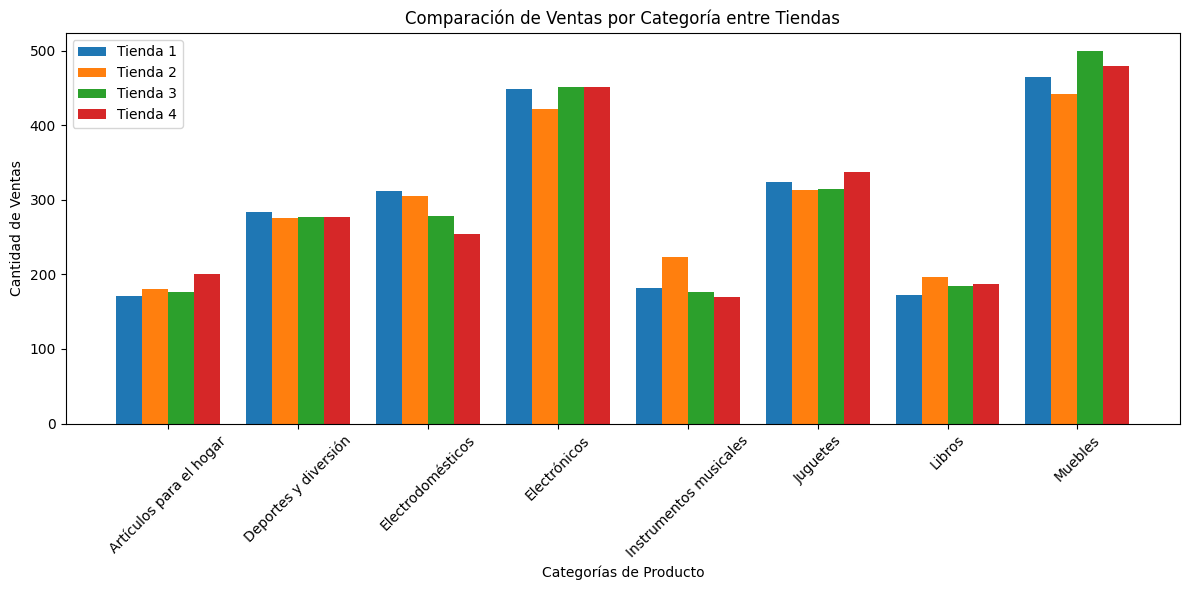

In [10]:
#Necesitamos un grafico comparativo que muestre los datos de cada tienda en un mismo grafico
#Por lo que debemos usar la biblioteca numpy para evitar la que se superponga las barras agrupadas
import numpy as np

# Inicializa una lista vacía para almacenar los datos de ventas de cada categoría de todas las tiendas
ventas_categoria = []

for tienda in tiendas:
    conteo = tienda['Categoría del Producto'].value_counts()
    ventas = [conteo.get(cat, 0) for cat in todas_categorias]
    # Agrega los datos de ventas a la lista
    ventas_categoria.append(ventas)

# Configuramos el gráfico
x = np.arange(len(todas_categorias))  # posiciones para categorías
width = 0.2  # ancho de cada barra

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
for i, ventas in enumerate(ventas_categoria):
    plt.bar(x + i * width, ventas, width, label=f'Tienda {i + 1}')

# Etiquetas y diseño
plt.xlabel('Categorías de Producto')
plt.ylabel('Cantidad de Ventas')
plt.title('Comparación de Ventas por Categoría entre Tiendas')
plt.xticks(x + width * 1.5, todas_categorias, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

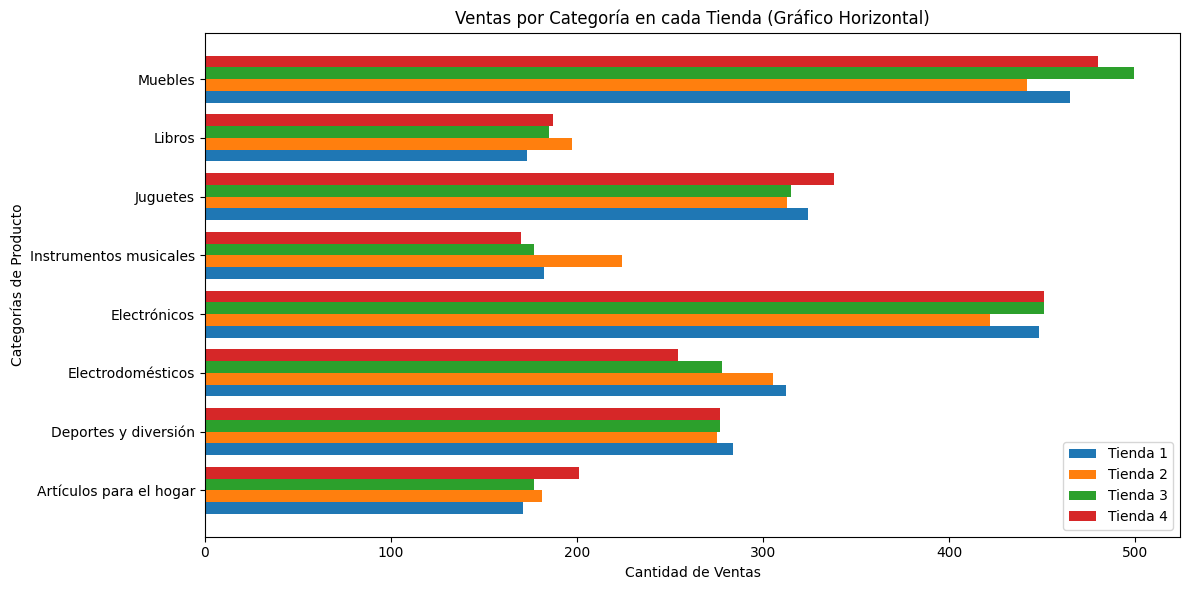

In [11]:

#Ahora exploraremos hacer el grafico en horizontal
# Primero cambiamos la configuracion de posiciones y tamaño del gráfico
y = np.arange(len(todas_categorias))  # Eje vertical (categorías)
height = 0.2  # Altura de cada barra

plt.figure(figsize=(12, 6))

# Graficar cada tienda como una barra horizontal
for i, ventas in enumerate(ventas_categoria):
    plt.barh(y + i * height, ventas, height, label=f'Tienda {i+1}')

# Etiquetas
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Categorías de Producto')
plt.title('Ventas por Categoría en cada Tienda (Gráfico Horizontal)')
plt.yticks(y + height * 1.5, todas_categorias)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [12]:
#Queremos comparar las calificaciones de los cliente por eso las mostraremos
def mostrar_Calificación_cliente(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        print(f"\nCalificación de cliente por Tienda {i}:")
        Calificación_cliente = tienda['Calificación'].value_counts()
        print(Calificación_cliente)
mostrar_Calificación_cliente(tiendas)



Calificación de cliente por Tienda 1:
Calificación
5    1292
4     444
1     319
3     218
2      86
Name: count, dtype: int64

Calificación de cliente por Tienda 2:
Calificación
5    1302
4     482
1     273
3     209
2      93
Name: count, dtype: int64

Calificación de cliente por Tienda 3:
Calificación
5    1356
4     434
1     297
3     193
2      79
Name: count, dtype: int64

Calificación de cliente por Tienda 4:
Calificación
5    1300
4     453
1     310
3     210
2      85
Name: count, dtype: int64


In [13]:
#Para evaluar mejor procedemos a promedio sus calificaciones para tenerlo mas claro:
#Usamos la funcion mean de panda que saca el promedio del dataframe
def mostrar_promedio_calificacion(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        promedio = tienda['Calificación'].mean()
        print(f"Tienda {i}: Promedio de calificación = {promedio:.2f}")

mostrar_promedio_calificacion(tiendas)

# Crear una lista
todos_promedio_calificacion = [tienda['Calificación'].mean() for tienda in tiendas]

Tienda 1: Promedio de calificación = 3.98
Tienda 2: Promedio de calificación = 4.04
Tienda 3: Promedio de calificación = 4.05
Tienda 4: Promedio de calificación = 4.00


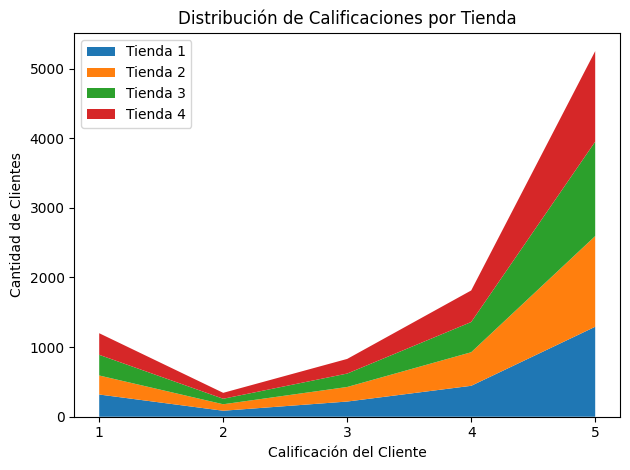

In [14]:
# Graficamos por zona para comparar las cantidades de calificaciones

# Rango de calificaciones posibles (eje X)
calificaciones = [1, 2, 3, 4, 5]

# Lista para almacenar los conteos por tienda (eje Y)
ventas_por_tienda = []

# Obtener la cantidad de calificaciones por valor (1-5) para cada tienda
for tienda in tiendas:
    conteo = tienda['Calificación'].value_counts().sort_index()
    # Asegurarse de tener siempre los 5 valores, incluso si faltan
    conteo_completo = [conteo.get(i, 0) for i in calificaciones]
    ventas_por_tienda.append(conteo_completo)

# Transponer la lista para que cada tienda sea una "serie" en el stackplot
plt.stackplot(calificaciones, *ventas_por_tienda, labels=[f'Tienda {i+1}' for i in range(len(tiendas))])

# Títulos y etiquetas
plt.title("Distribución de Calificaciones por Tienda")
plt.xlabel("Calificación del Cliente")
plt.ylabel("Cantidad de Clientes")
plt.legend(loc="upper left")
plt.xticks(calificaciones)
plt.tight_layout()
plt.show()



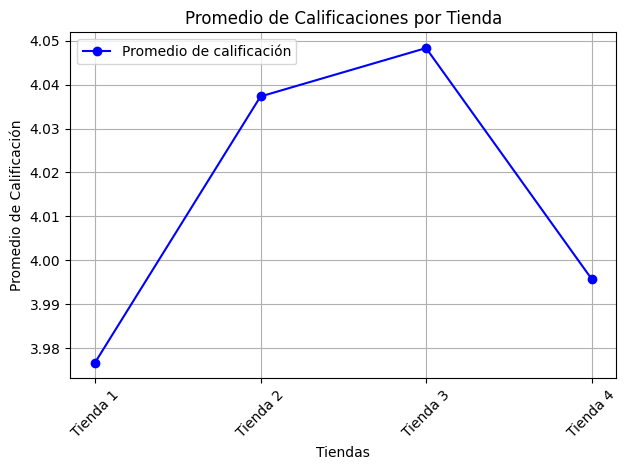

In [15]:
#Para poder comparar mejor haremos un grafico con los promedio de calificaciones

nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
# Como no hay un eje temporal, simulamos puntos consecutivos en X
x = list(range(len(tiendas)))

# Gráfico de línea
plt.plot(x, todos_promedio_calificacion, marker='o', linestyle='-', color='blue', label="Promedio de calificación")

# Etiquetas y diseño
plt.xticks(x, nombres_tiendas, rotation=45)
plt.xlabel("Tiendas")
plt.ylabel("Promedio de Calificación")
plt.title("Promedio de Calificaciones por Tienda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


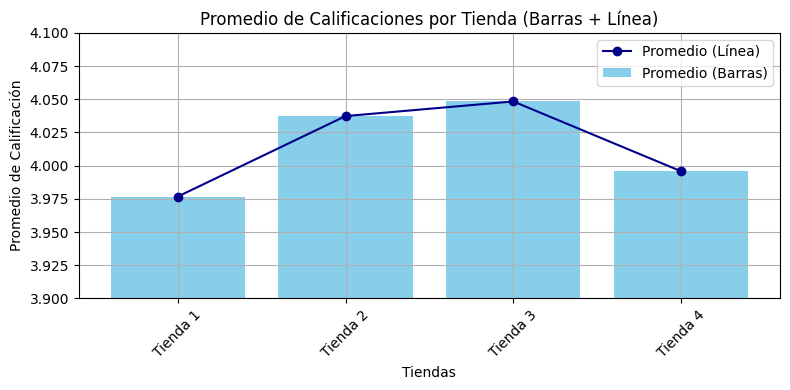

In [16]:
#Podemos experimentar mejorar el grafico agregando un grafico de barra:
x = list(range(len(tiendas)))  # Posiciones en el eje X

plt.figure(figsize=(8, 4))

# Gráfico de barras
plt.bar(x, todos_promedio_calificacion, color='skyblue', label="Promedio (Barras)")

# Gráfico de línea sobre el mismo eje
plt.plot(x, todos_promedio_calificacion, marker='o', linestyle='-', color='darkblue', label="Promedio (Línea)")

# Etiquetas y diseño
plt.ylim(3.9, 4.1)
plt.xticks(x, nombres_tiendas, rotation=45)
plt.xlabel("Tiendas")
plt.ylabel("Promedio de Calificación")
plt.title("Promedio de Calificaciones por Tienda (Barras + Línea)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [17]:
def mostrar_ventas_por_producto(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        print(f"\nVentas por producto en Tienda {i}:")
        ventas_producto = tienda['Producto'].value_counts()
        print(ventas_producto)
mostrar_ventas_por_producto(tiendas)

# Crear una lista
todos_productos = sorted(set(cat for tienda in tiendas for cat in tienda['Producto'].unique()))


Ventas por producto en Tienda 1:
Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                       44
Cama 

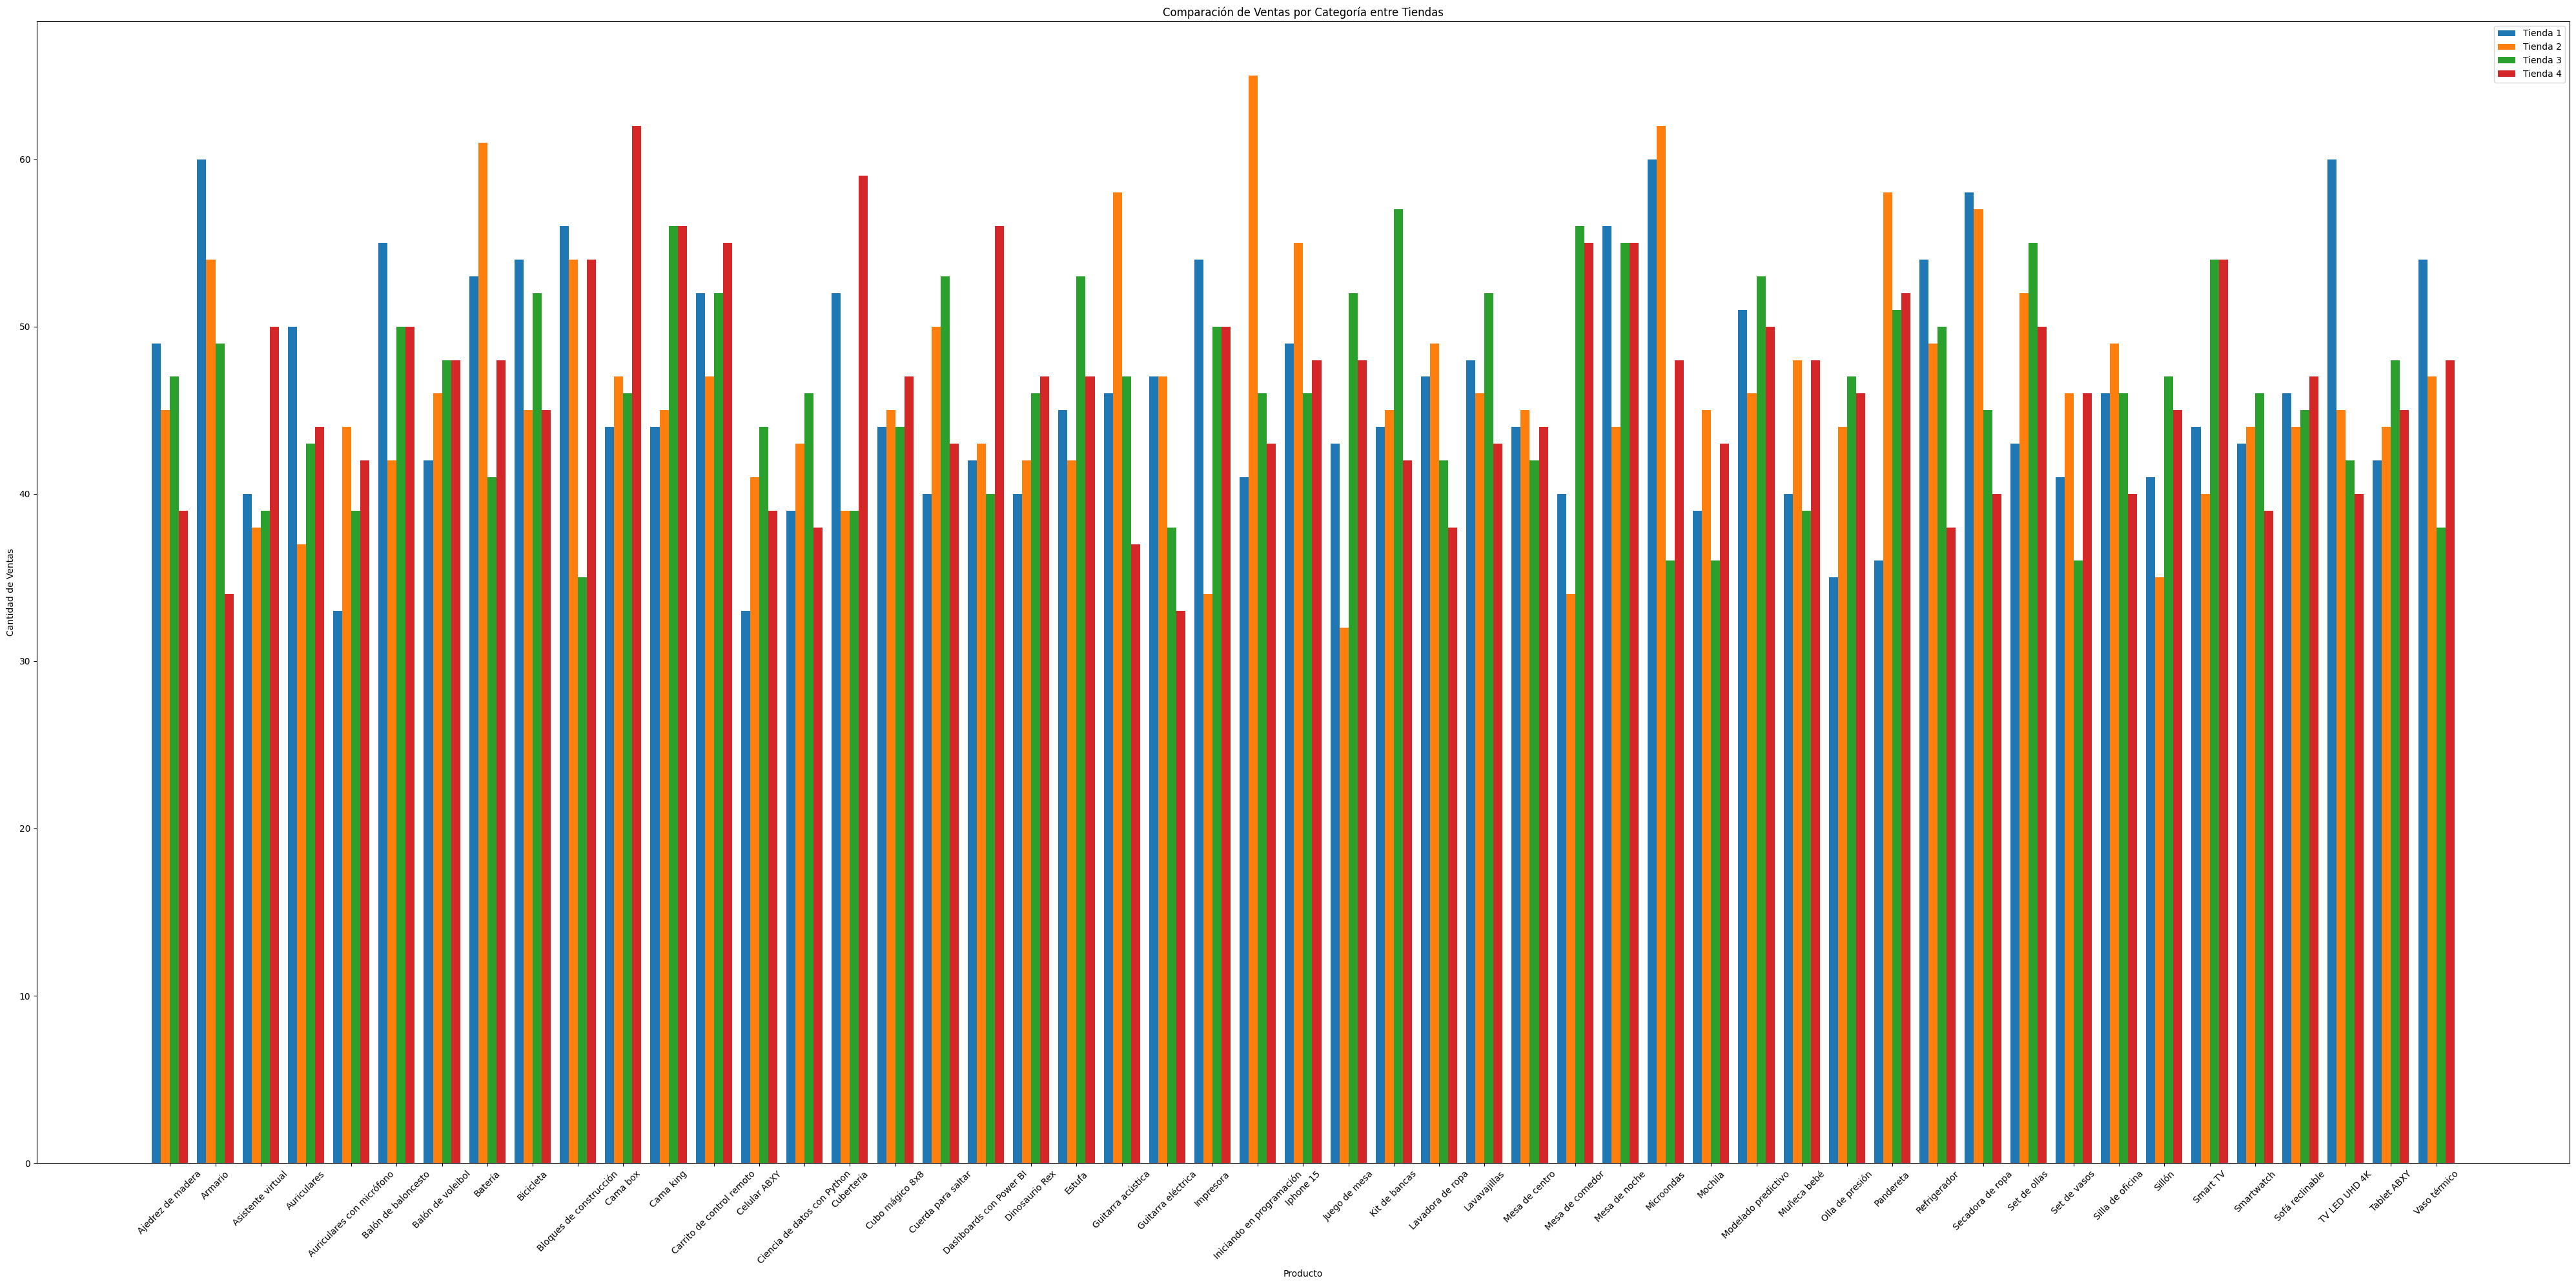

In [18]:

# Inicializa una lista vacía para almacenar los datos de ventas de cada categoría de todas las tiendas
ventas_producto = []

for tienda in tiendas:
    conteo = tienda['Producto'].value_counts()
    ventas = [conteo.get(cat, 0) for cat in todos_productos]
    # Agrega los datos de ventas a la lista
    ventas_producto.append(ventas)

# Configuramos el gráfico
x = np.arange(len(todos_productos))  # posiciones para categorías
width = 0.2  # ancho de cada barra

# Creamos el gráfico de barras agrupadas
plt.figure(figsize=(40, 20))
for i, ventas in enumerate(ventas_producto):
    plt.bar(x + i * width, ventas, width, label=f'Tienda {i + 1}')

# Etiquetas y diseño
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.title('Comparación de Ventas por Categoría entre Tiendas')
plt.xticks(x + width * 1.5, todos_productos, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

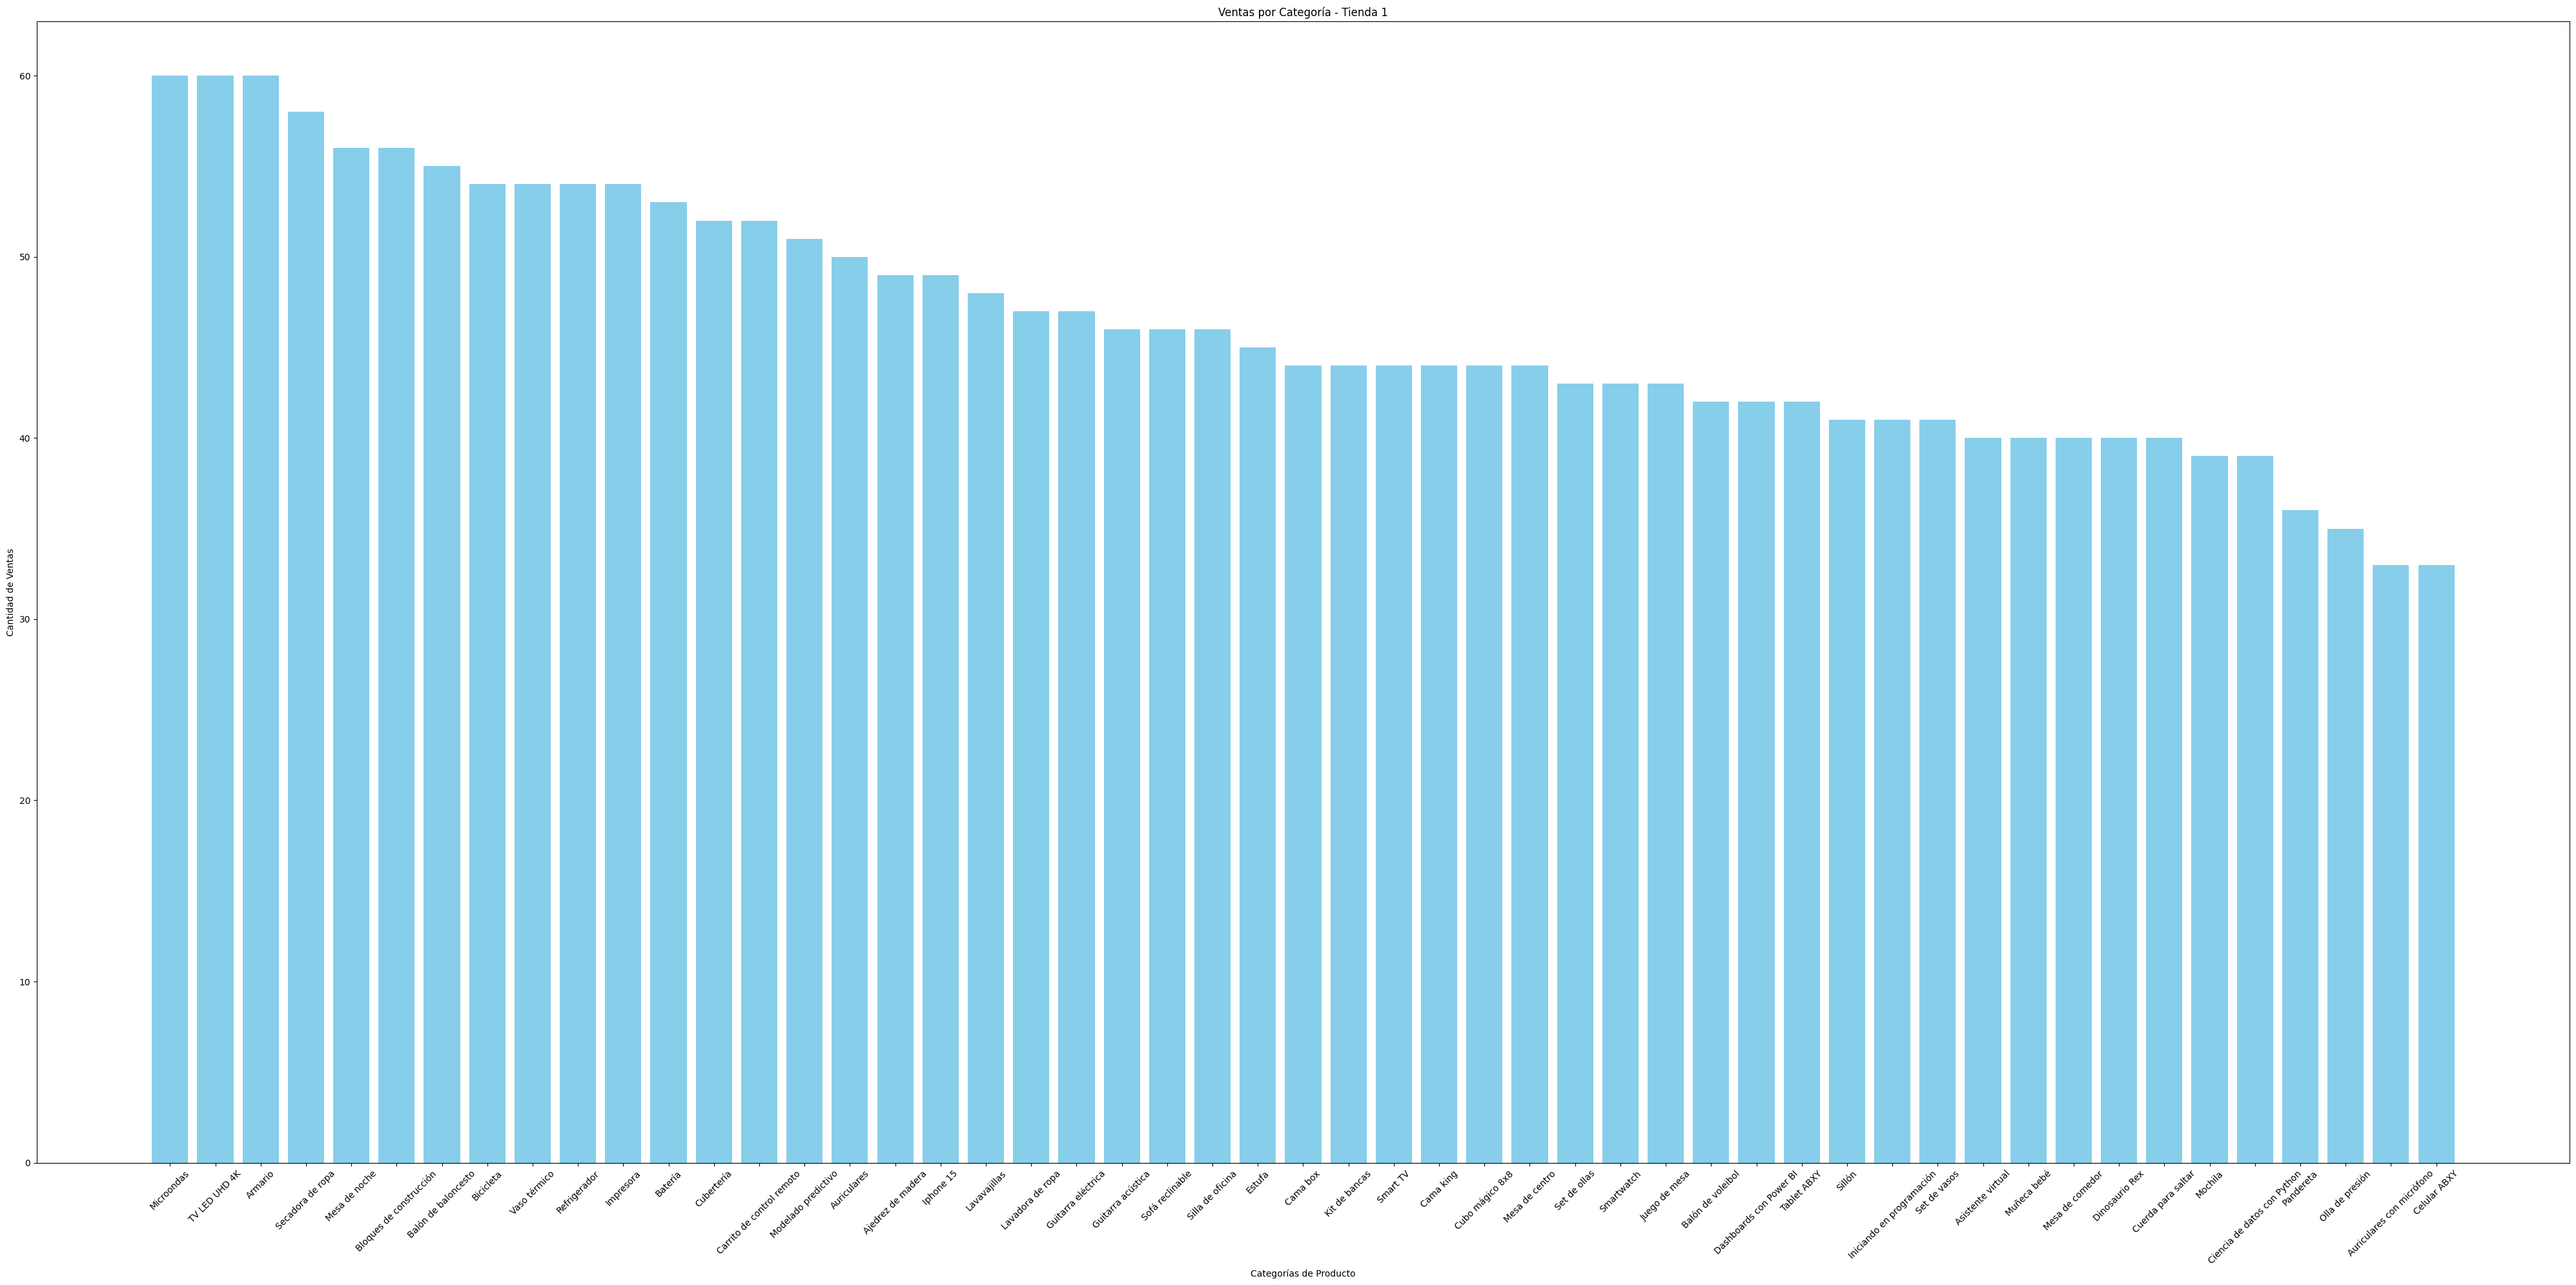

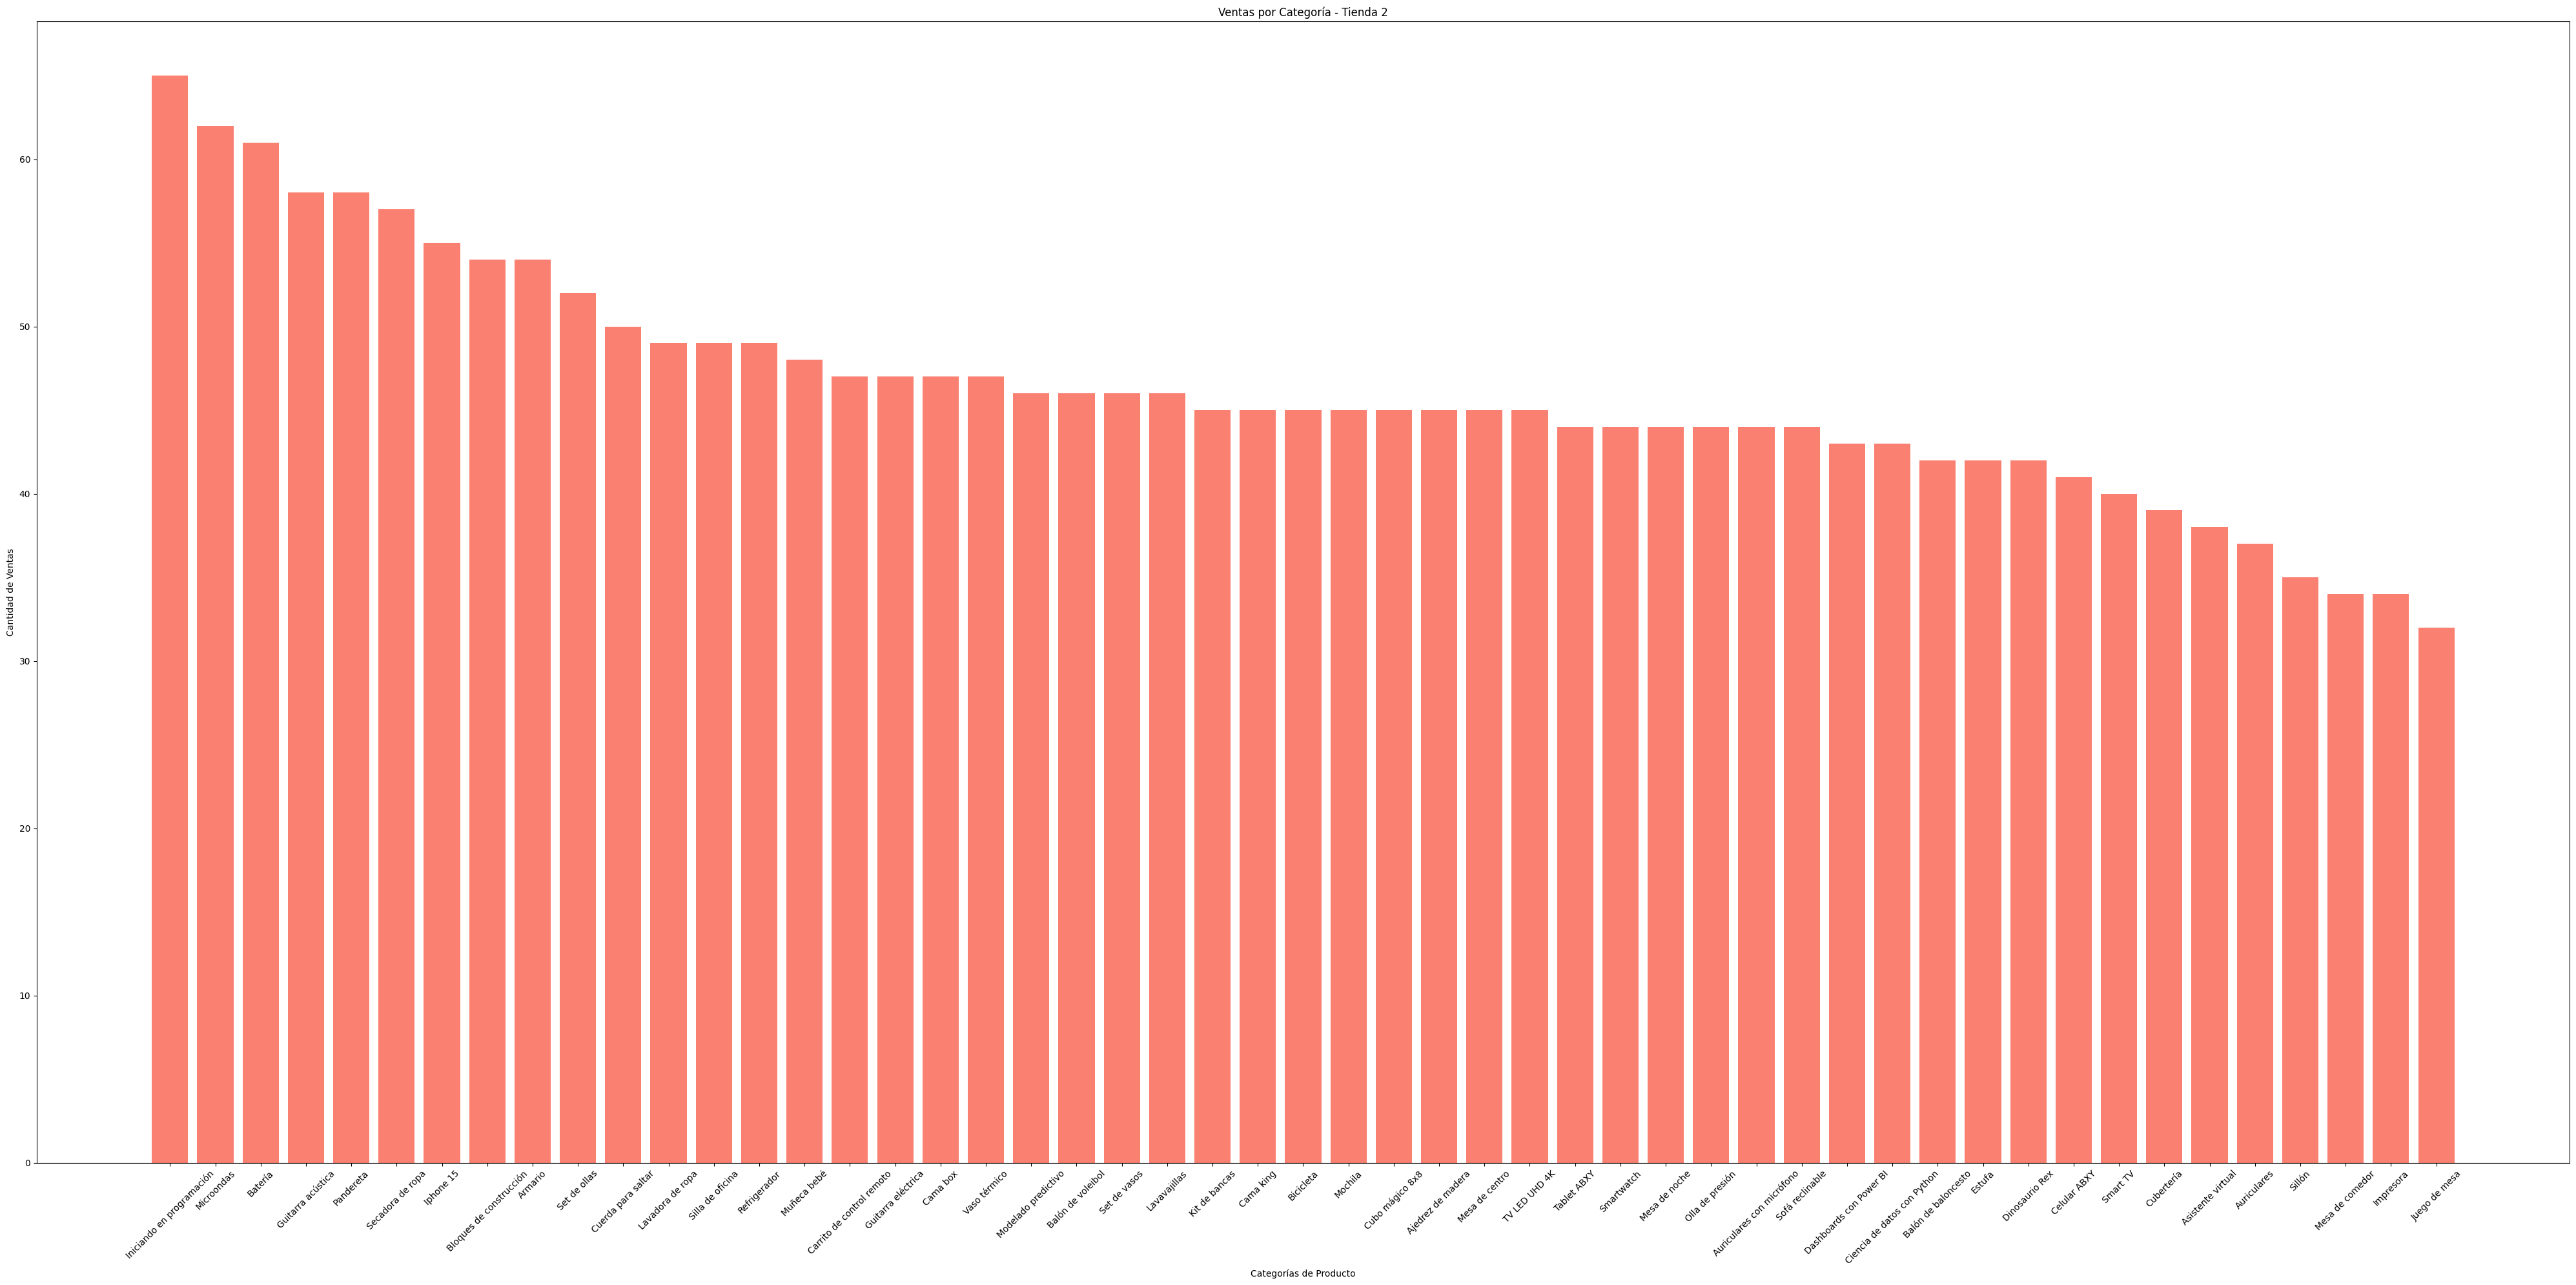

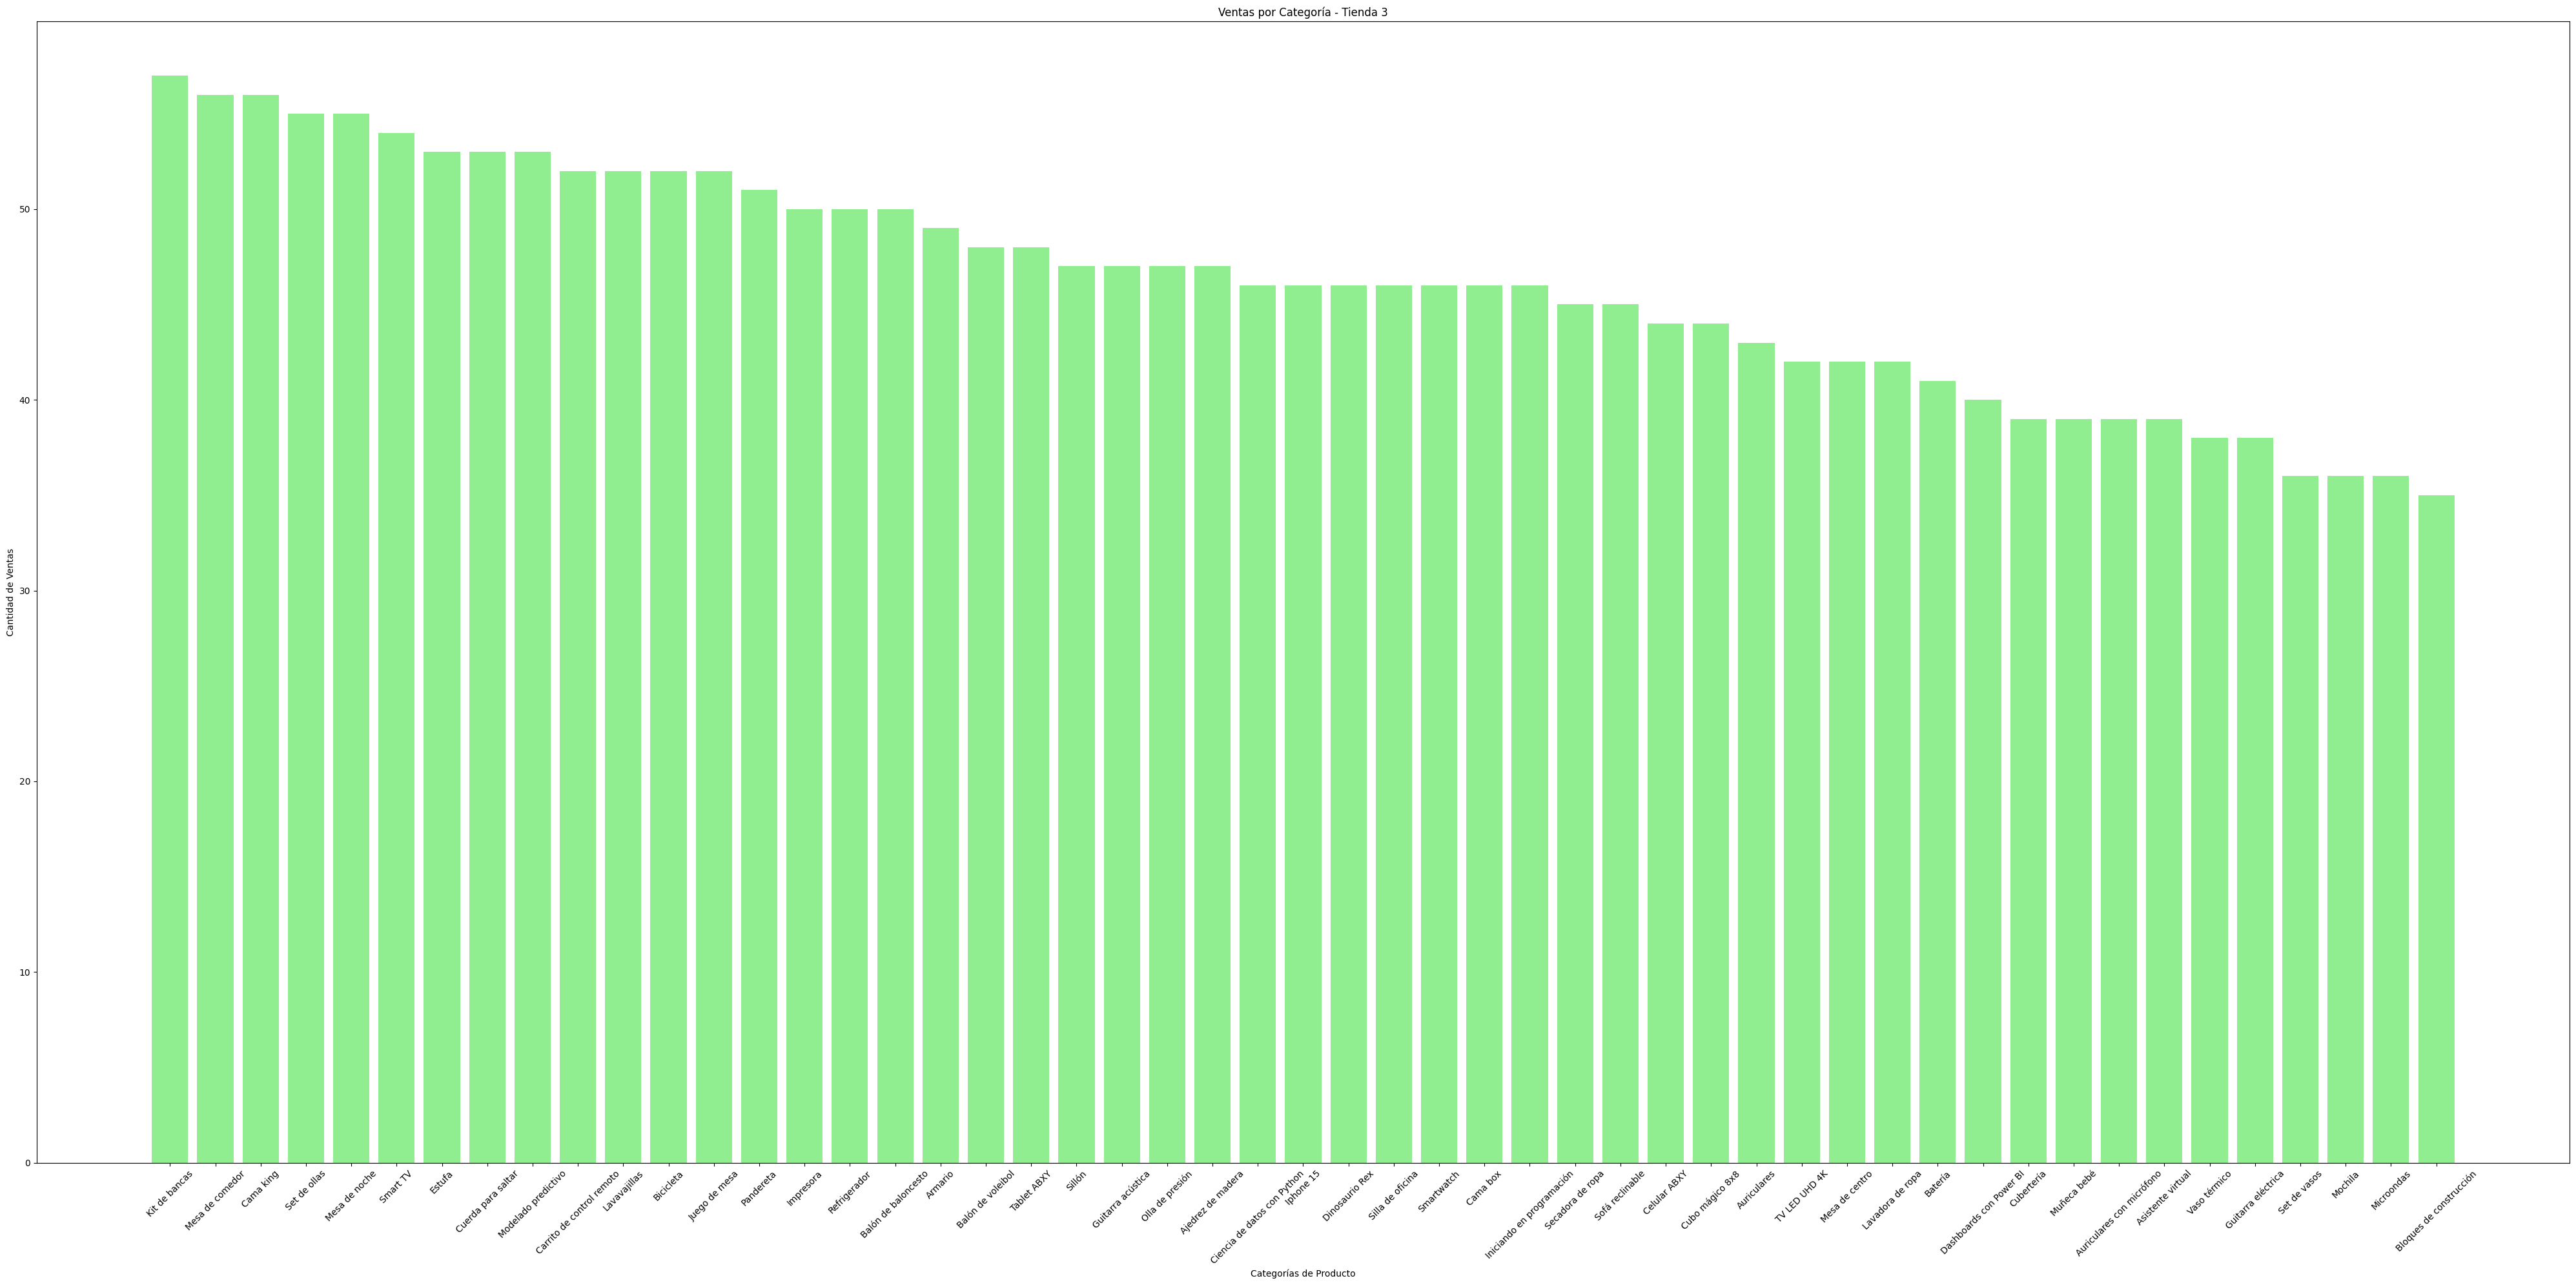

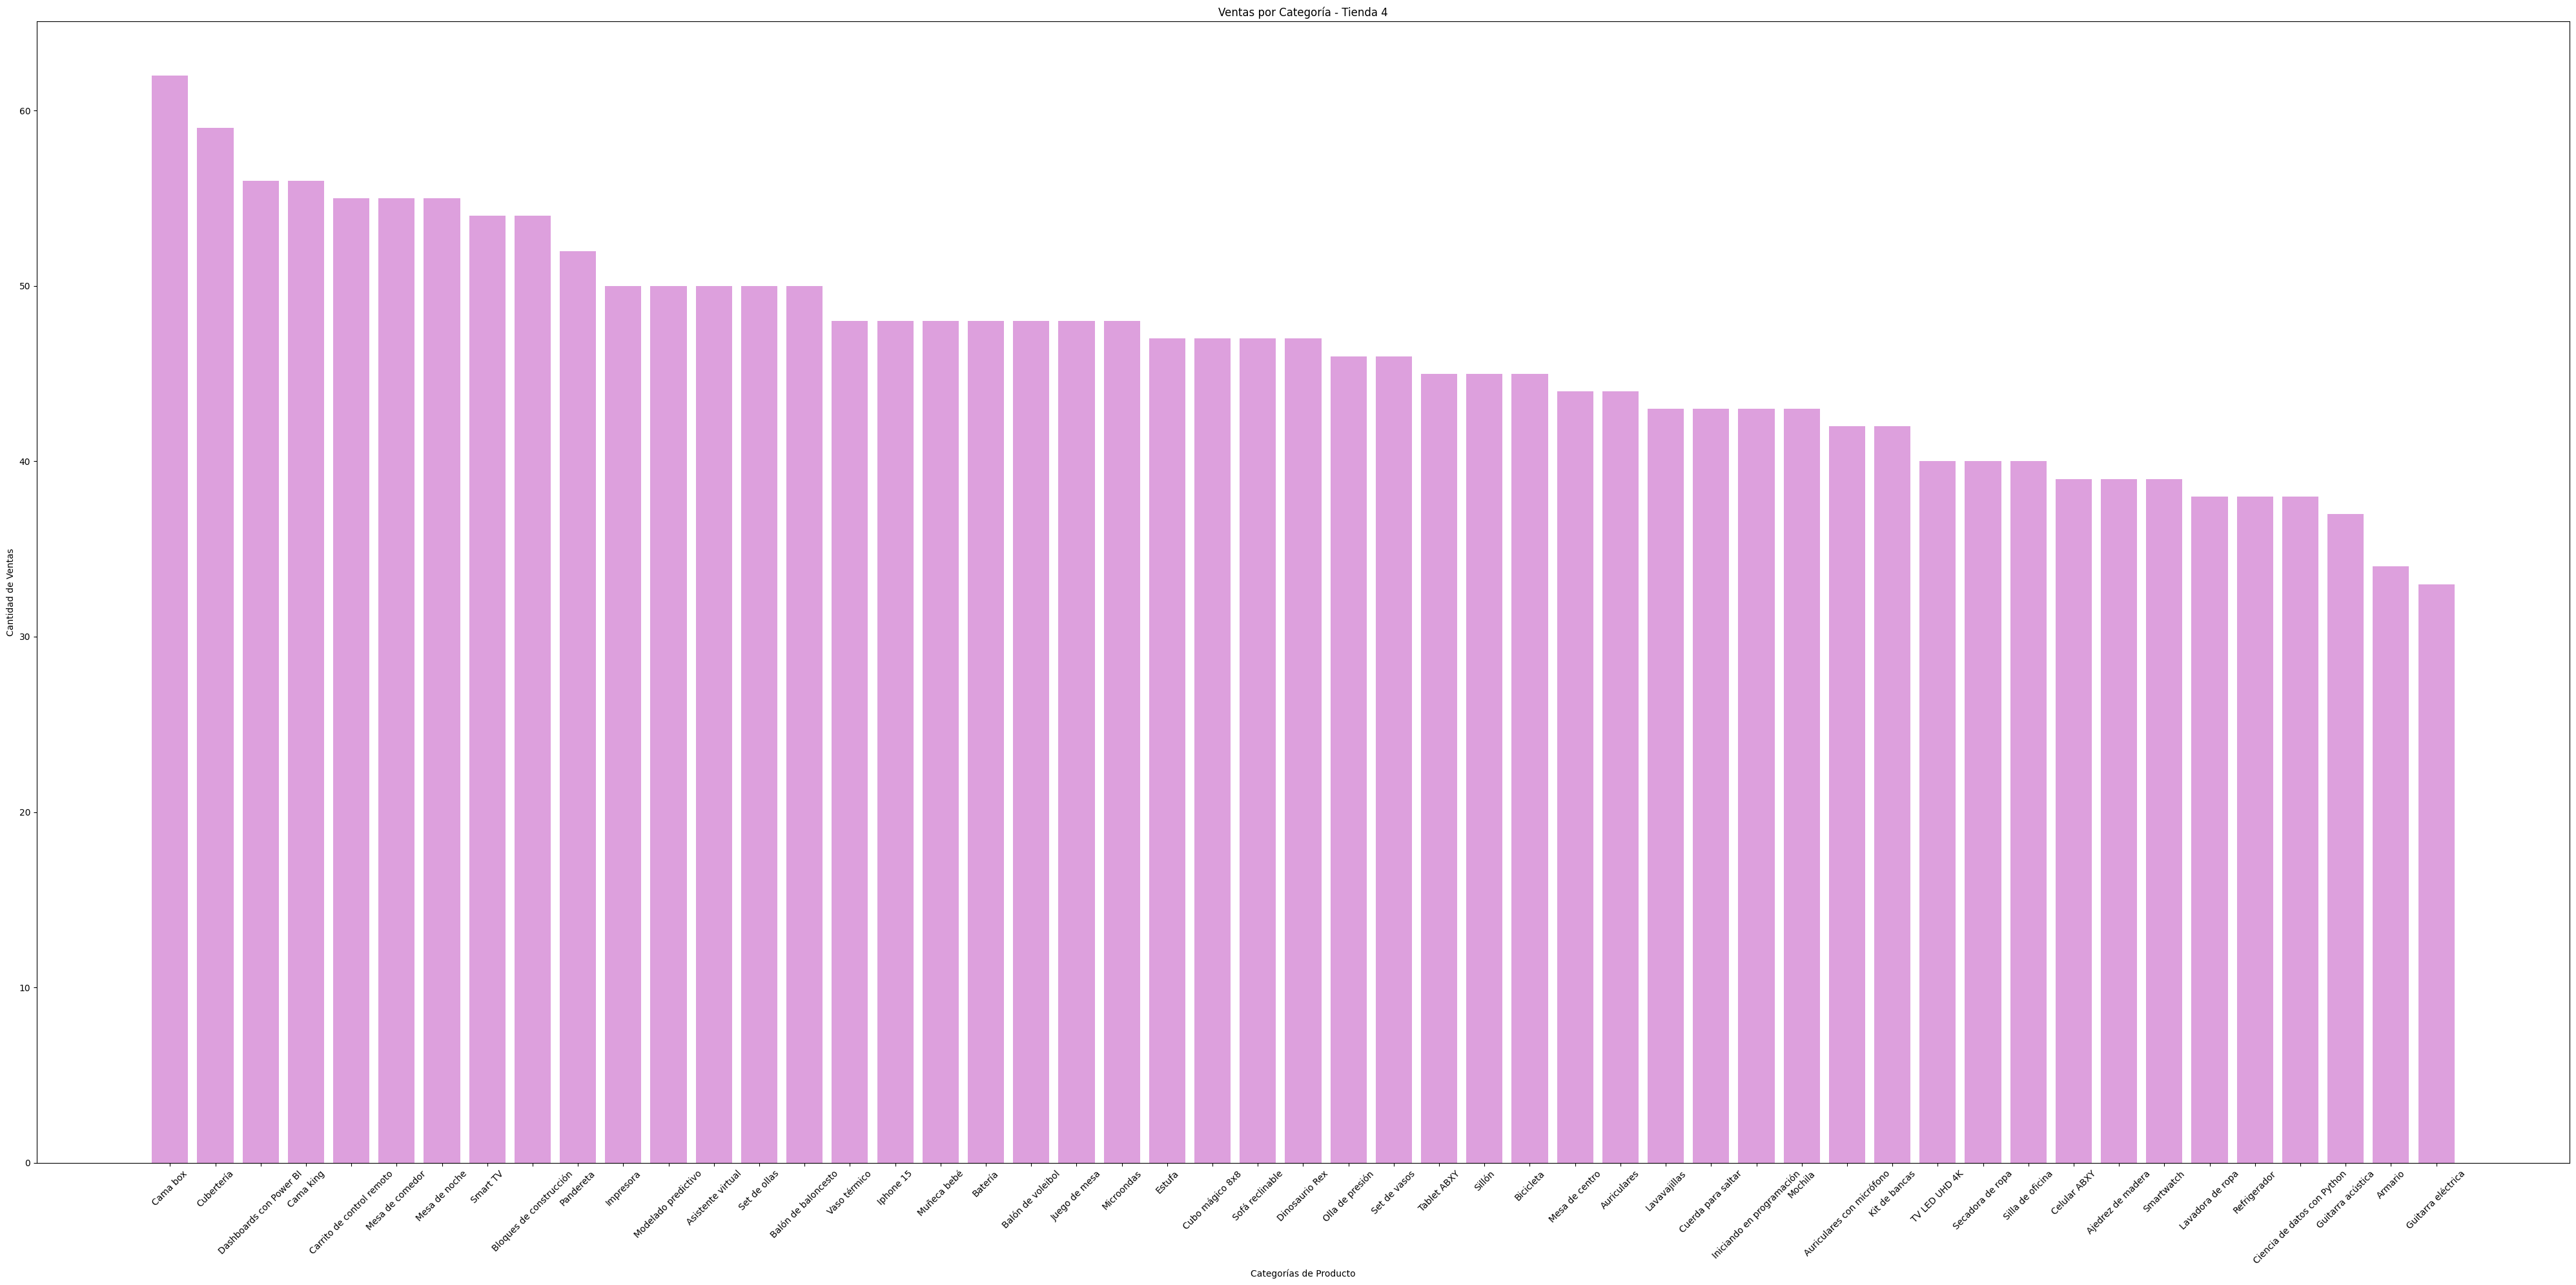

In [19]:
#Intentar poner todos los datos en un solo grafico no es factible
#Por lo que se decidio crear un grafico de barras para cada tiendas para saber su producto mas y menos vendido
#Debido a la gran cantidad de producto que tienen

  # Lista de colores para cada tienda
colores = ['skyblue', 'salmon', 'lightgreen', 'plum']

for i, tienda in enumerate(tiendas, start=1):


    # Contamos ventas por categoría
    ventas_producto = tienda['Producto'].value_counts()

    # Preparamos datos para graficar
    producto = ventas_producto.index
    cantidades = ventas_producto.values

    # Graficamos
    plt.figure(figsize=(40, 20))
    plt.bar(producto, cantidades,color=colores[i-1] )
    plt.title(f"Ventas por Categoría - Tienda {i}")
    plt.xlabel("Categorías de Producto")
    plt.ylabel("Cantidad de Ventas")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()







# 5. Envío promedio por tienda

In [31]:
# Ahora sacaremos el promedio del costo de envio de cada tienda
def mostrar_promedio_CostoEnvio(tiendas):
    for i, tienda in enumerate(tiendas, start=1):
        promedio_Envio = tienda['Costo de envío'].mean()
        print(f"Tienda {i}: Promedio de costo de envío = {promedio_Envio:.2f}")

mostrar_promedio_CostoEnvio(tiendas)

# Crear una lista de tienda
todos_promedio_Envio = [tienda['Costo de envío'].mean() for tienda in tiendas]

Tienda 1: Promedio de costo de envío = 26018.61
Tienda 2: Promedio de costo de envío = 25216.24
Tienda 3: Promedio de costo de envío = 24805.68
Tienda 4: Promedio de costo de envío = 23459.46


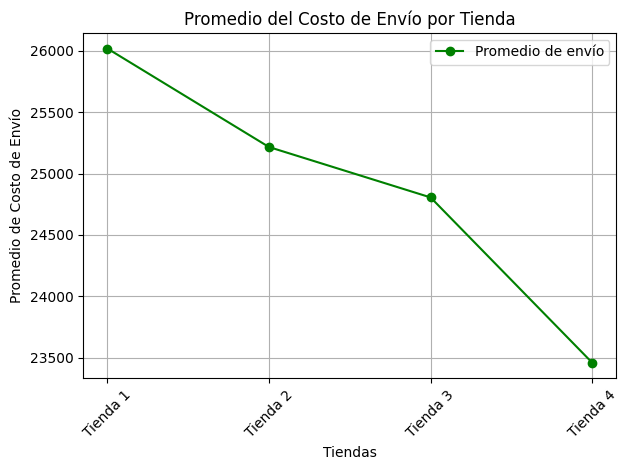

In [33]:
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
x = list(range(len(tiendas)))

# Usamos la lista de promedios previamente creada
plt.plot(x, todos_promedio_Envio, marker='o', linestyle='-', color='green', label="Promedio de envío")

# Etiquetas
plt.xticks(x, nombres_tiendas, rotation=45)
plt.xlabel("Tiendas")
plt.ylabel("Promedio de Costo de Envío")
plt.title("Promedio del Costo de Envío por Tienda")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ***Informe Final***

# *Introducción*

Se ha realizado un analisis de los datos de 4 tiendas en cual el señor Juan esta interesado en invertir, vendiendo sus producto para ellos por medios de los datos que tenemos de la 4 tiendas tales como sus productos, precios, calificaciones de los clientes y costo de envio, se estimo cual tienda es la mejor para invertir no solo considerando sus ingresos sino que tan estable son sus ventas por medios de la calificaciones de sus clientes y si lidera el mercado en las categorias mas vendidas de productos.

# *Desarrollo*

El primer punto a considerar son los ingresos que proporciona cada tienda vinculado a los precios de sus productos en este aspecto quien lidera seria la tienda 1 con S/ 1,150,880,400.00 soles que podemos verificar en los graficos de barra que muestra su superioridad en ese aspecto, siendo los ingresos de las otras tiendas los siguientes:

Tienda 2: S/ 1,116,343,500.00

Tienda 3: S/ 1,098,019,600.00

Tienda 4: S/ 1,038,375,700.00

Como segundo aspecto es la tendecia de los producto que se ve en las categorias con mas ventas siendo esta los muebles , electronicos y juguetes, la tienda que lidera esta tendencia es la tienda 3, se logro esta conclusion comparando las tiendas en el grafico respectivo.

El tercer punto es la calificacion de los clientes, se promedio esa calificaciones teniendo el mayor promedio la tienda 3 con 4.05, las otras tiendas tienen los siguientes promedios:

Tienda 2:	4.04

Tienda 4:	4.00

Tienda 1:	3.98

El cuarto punto seria los volumen de ventas de los productos de cada tiendas si bien no coinciden en los productos mas y menos vendidos podemos sacar algunas conclusiones de cada tienda respecto a sus ventas que serian:

Tienda 1 tiene muchos productos con ventas equilibradas (entre 33 y 60), pero menos “productos estrella”.

Tienda 2 tiene algunos productos con más de 60 unidades vendidas, lo que puede reflejar una estrategia de “productos gancho”.

Tienda 3 y 4 destacan por tener ventas bastante distribuidas entre muchos productos, lo que reduce riesgo por dependencia de un solo artículo.

Por ultimo estaria los costos de envio que refleja la logistica de cada tiendas siendo la que tiene menor costo la tienda 4 con S/23,459.46 los demas tiene un costo de:

Tienda 3:	S/24,805.68

Tienda 2:	S/25,216.24

Tienda 1:	S/26,018.61


# *Conclusión*

Teniendo en cuenta lo anterior, la opcion de tienda que recomiendo seria la tienda 3, primero es la tienda con mejor calificacion entre todas la tiendas dando a entender que es confiable para los clientes teniendo una poblacion fija de ventas gracia a ello, lo cual se ve reflejado en la diversificacion de su productos pues sus ventas esta equilibrada entre todos sus productos, si bien en ingreso no es el mejor tampoco es el peor y lo compensa con su bajo costo de envio lo cual hace viable una inversion que promete una devolucion estable de lo invertido , gracias a la estabilidad de sus ventas y bajos costos logistico.